In [19]:
#imports 
import numpy as np #maths
import cv2 #open computer vision
from matplotlib import pyplot as plt #plotting library

In [20]:
#Example get a video source
cap = cv2.VideoCapture(0)

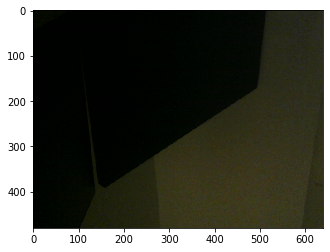

In [21]:
#Example show an image
ret, input_image = cap.read() 
plt.imshow(input_image[:,:,::-1]) #[:,:,::-1] converts BGR to RGB

In [22]:
#Init orb feature detector/computer
orb = cv2.ORB_create(edgeThreshold=2, patchSize=100, nlevels=15, fastThreshold=4, nfeatures=1000000, scoreType=cv2.ORB_FAST_SCORE, firstLevel=0)
#Detect and compute orb keypoints and keypoint descriptors from input image.
kp1, des1 = orb.detectAndCompute(input_image, None)

In [23]:
#draw keypoints onto image 
output_image = cv2.drawKeypoints(input_image,kp1,color=(0,255,0), outImage=None, flags=0)

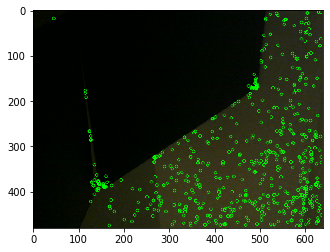

In [24]:
#plot result
plt.imshow(output_image[:,:,::-1])

In [7]:
#number of key points
len(kp1)

1653

In [8]:
## keypoint descriptions (note the feature description is a 1by32 vector)
des1.shape 

(1653, 32)

In [9]:
pts = cv2.KeyPoint_convert(kp1) #turns a list keypoints into a list of numpy 2by1 arrays [x,y],[x,y],..

In [10]:
len(pts) #number of keypoints still the same good

1653

In [11]:
pts[0] #show point

array([46.,  3.], dtype=float32)

In [12]:
(x,y) = kp1[0].pt #extract point from what detectAndCompute gave us instead as tuple this time

In [13]:
(x,y)

(46.0, 3.0)

In [14]:
des1

array([[210,  51,  79, ...,  26,  77,  93],
       [177, 145,  97, ...,  31,  43,  90],
       [130, 177, 121, ...,  27,  47, 213],
       ...,
       [130, 213,  49, ..., 177, 163,  16],
       [147, 253, 113, ..., 209, 191,  20],
       [190, 225,  99, ...,  60, 134,  83]], dtype=uint8)

In [15]:
des1[0] #look at a particular keypoint descriptor (note we can use this as the identity of this point!)

array([210,  51,  79, 187, 220, 240, 110, 104, 170, 112,  84,  24, 138,
        49, 221, 228,  46,  36, 205, 211, 121, 113,  92,   8,  94,  36,
       202,  50, 205,  26,  77,  93], dtype=uint8)

In [16]:
#lets have a look at another frame
ret, input_image2 = cap.read() 
kp2, des2 = orb.detectAndCompute(input_image2, None)

In [17]:
#turn off webcam
cap.release()

i1 = 0
i2 = 0
# for each 32 vector within des2 (our second image)
for des2i in des2:
    i2 = i2 + 1
    # for each 32 vector within des1 (our first image)
    for des1i in des1:
        i1 = i1 + 1
        
        #lets play with some tests
        print("des indexes we are comparing [", i1, i2, "]: ")
        print("des1: ---------")
        print(des1i)
        print("des2: ---------")
        print(des2i)

        # primitive method of detecting the quality of a match
        print("are the des vectors exactly equal?---------")
        print(np.array_equal(des2i, des1i))
        
        # better:
        # idea is the percent of exact pairwise equality in the 32 dimensional space gives 'some' of the quality
        print("do the and'd des vectors sum to some high percentage?")
        print(np.sum(des1i==des2i)/.320, "%")

        ## better would be a metric of distance e.g. regular eucldean distance in 32 space.
        # best matches would minimise this number
        print("what is the eucleaden distance of these 32d des vectors?")
        print(np.linalg.norm(des2i-des1i))

        print("######################################")
    i1 = 0
print("last des1i, des2i", i1, i2)

In [18]:
# what did we learn? for this particular feature detector, l2 norm is useless for binary features, string matching methods do better
# whats the best?
#https://en.wikipedia.org/wiki/Hamming_distance